![AIAP Banner](../images/AIAP-Banner.png "AIAP Banner")

<h1><center>Assignment 1 - Part 1: 
<br>
Data Cleaning & Feature Engineering</center></h1>

<span style='color:#0cf'> Mohammad Hanafi Bin Md Haffidz </span>

```{toggle}
asdasd
```

# Before starting...

### How to structure your answers

There are many different ways to approach a problem in AI/ML. When attempting the problems in the notebooks, keep in mind that there is no definite "correct way" to handle any problem. Instead, when choosing which method to use, focus on how current literature approaches the problem, how you intend to evaluate the effectiveness of the solution you are proposing and how to improve the solution if necessary. Similarly, for the "open-ended" questions, it is important to substantiate your answers with supporting reasons. Be sure to bounce your ideas off each other to see how different people approach the same problem!

### Coding conventions

Learning good habits and ensuring your code follows a certain convention is very important in an environment where your code will be shared and read by others. Following the standard conventions highlighted in the [PEP-8 document](https://www.python.org/dev/peps/pep-0008/) is a good start.

### Reproducible Data Pipeline

In the next few sections, you will be creating a data pipeline in a step by step process. At the end of this notebook, you have to combine all of these steps into a Python module named `datapipeline.py` in the [src folder](./src). The module should contain at least a function with the following signature:

```python
def transform(data_path):
  """
  :param data_path: ......
  :return: ......
  """
  return feature_engineered_dataframe
```

Once complete, you will be able to use this function freely in this notebook or other notebooks. This will ensure consistency in the data transformation process.


# 1. Introduction


Most machine learning projects follow a typical flow. 

    - Defining the problem statement
    - Identifying an appropriate dataset
    - Extracting the relevant data from data sources
    - Defining and labelling the dataset
    - Data cleaning
    - Exploring the dataset, refered to as Exploratory Data Analysis (EDA)
    - Feature engineering
    - Selecting and training appropriate models
    - Evaluating the model
    - Repeating the above steps (data identification to model evaluation) until desired performance is achieved
    - Deploying the model
    - Model maintenance and retraining (if necessary)


For this assignment, we will explore clustering in unsupervised learning. Keep this in mind when performing the data preparation steps (data extraction, data cleaning, EDA and feature engineering) in the next sections of this notebook.

#### 1.1. Topics
1. SQL query
2. Data cleaning
3. Exploratory data analysis
4. Feature Engineering
5. Data pipeline

#### 1.2. Deliverables
1. Jupyter notebook
2. Script: `datapipeline.py`

# 2. Data Extraction


The data for this assignment were modified from the US census-income dataset on the UCI dataset repository. **Please do not download the data directly from the UCI repository. Instead, follow the instructions below to query the dataset from our database.** Additionally, please refer to this [link](https://www2.1010data.com/documentationcenter/beta/Tutorials/MachineLearningExamples/CensusIncomeDataSet.html) for a description of the variables.

The data are stored in a database. If you are not familiar with databases, please refer to this [link](https://medium.com/@rwilliams_bv/intro-to-databases-for-people-who-dont-know-a-whole-lot-about-them-a64ae9af712) to obtain a high level overview of databases and their related terms.

The type of database used is an Azure SQL Server instance. SQL Server is Microsoft's RDBMS product offering which uses a variant of SQL (Structured Query Language) called T-SQL (Microsoft Transact-SQL).
There are many resources available online to learn how to write T-SQL and you should be able to find one that fits to your level of understanding. One such resource is on [TutorialsPoint](https://www.tutorialspoint.com/t_sql/index.htm). In addition, you can use Microsoft's [reference pages](https://docs.microsoft.com/en-us/sql/t-sql/language-reference?view=sql-server-ver15) to quickly look up syntax documentation.
At a minimum, you should be able to combine and extract data from multiple tables in an efficient manner so that you can complete your assignments.

If you have trouble accessing the database, you may have to download the Microsoft ODBC Driver. Follow the download instructions for [Windows](https://docs.microsoft.com/en-us/sql/connect/odbc/windows/system-requirements-installation-and-driver-files?view=sql-server-ver15) or [Mac/Linux](https://docs.microsoft.com/en-us/sql/connect/odbc/linux-mac/installing-the-microsoft-odbc-driver-for-sql-server?view=sql-server-ver15#microsoft-odbc-driver-131-for-sql-server).

The data is hosted on an Azure SQL Server with the following details:

    server = 'aiap-training.database.windows.net'
    database = 'aiap'
    username = 'apprentice'
    password = 'Pa55w.rd'
    driver= '{ODBC Driver 17 for SQL Server}'


There are 3 separate tables, `basic_bio`, `employment`, `residential_tax`. All of these tables have an `id` column that can be used to merge them.


The pandas package has a `read_sql_query` function that can be used to access the data. You may require another python package to use this function.

#### 2.1. Query all 3 tables from the SQL server and combine them into a single pandas dataframe. Save this dataframe as a `.csv` file on your local computer with the filepath `assignment1/data/raw/data.csv`.

<div style='background:#555;color:#fc0;text-align:center;font-weight:bold'>**Documentation**</div>
<br>
<div style='color:#0cf'>

- Running this query: `SELECT COUNT(*) as basic_bio_count FROM basic_bio;` on all 3 tables in the db, we see there are 199503 rows each. Meaning that the tables should correspond one-to-one.
- However, an inner join nets 199463 rows (lose 40 rows), and a full outer join nets 199543 rows (extra 40 rows), meaning there is some discrepancy in the id column.
- Also the full outer join causes some ids to appear as duplicates, the values from the 3 tables did not consolidate:
```
             basic_bio columns |  employment cols   |    tax cols
    id_123   data  data  data  |  null  null  null  |  null  null  null
    id_123   null  null  null  |  null  null  null  |  data  data  data
```

- Perhaps some other SQL functions like `COALESCE` or `UNION` may solve this, but since I do not fully understand those functions, I will simply read in the 3 SQL tables as separate DataFrames and merge them using pandas.
- Doing so, we got 199523 rows.

In [10]:
# SKIP : This is the initial read of the SQL to discover the issue specified above

# import pyodbc
# import pandas as pd

# # display options
# pd.set_option('display.max_colwidth', 50)
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.precision', 3)

# # database details
# server = 'aiap-training.database.windows.net'
# database = 'aiap'
# username = 'apprentice'
# password = '{Pa55w.rd}'
# driver = '{ODBC Driver 17 for SQL Server}'

# # csv path
# data_path = './data/raw/data.csv'

# # sql query
# query = 'SELECT * FROM basic_bio FULL OUTER JOIN employment ON basic_bio.id = employment.id FULL OUTER JOIN residential_tax ON basic_bio.id = residential_tax.id'

# # read from sql database
# with pyodbc.connect(
#         'DRIVER='+driver+
#         ';SERVER=tcp:'+server+
#         ';PORT=1433;DATABASE='+database+
#         ';UID='+username+
#         ';PWD='+ password) as conn:
#     df = pd.read_sql(query, conn, index_col=None)

# print(len(df))

# display(pd.Series(df.columns))

# id0 = df.iloc[:,0].tolist()
# id11 = df.iloc[:,11].tolist()
# id35 = df.iloc[:,11].tolist()
# allids = id0 + id11 + id35
# allids = pd.Series(allids)
# print(len(allids.unique()))
# print('199523 rows plus 1 row of NaN calculated using the .unique function.')



In [1]:
import pandas as pd
import src.datapipeline as pipe

# display options
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.precision', 3)
# database details
server = 'aiap-training.database.windows.net'
database = 'aiap'
username = 'apprentice'
password = '{Pa55w.rd}'
driver = '{ODBC Driver 17 for SQL Server}'
# csv path
data_path = './data/raw/data.csv'

#! skipping this step and just loading from csv
# load from server and save to csv
# pipe.load_data_to_csv(server, database, username, password, driver, data_path)

# load from csv
df = pipe.load_csv(data_path)

In [2]:
import pandas as pd
import src.datapipeline as pipe
data_path = './data/raw/data.csv'

df = pipe.load_csv(data_path)

In [73]:
rows_n_missing_counts(df)

2141      23
5495      23
10327     23
12049     23
16403     23
          ..
70202      1
70410      1
71288      1
71727      1
100482     1
Length: 934, dtype: int64

In [74]:
rows_n_missing_counts(df, 14)

[8037,
 28058,
 48077,
 50977,
 69316,
 70550,
 78698,
 100384,
 108900,
 115108,
 128418,
 133595,
 137955,
 145846,
 146026,
 148134,
 179139,
 182137,
 188020,
 190735,
 2141,
 5495,
 8596,
 10327,
 12049,
 16403,
 19010,
 34536,
 59163,
 64919,
 73939,
 81926,
 102027,
 129191,
 138935,
 145064,
 181182,
 185259,
 189690,
 198778,
 18289,
 20054,
 40156,
 42074,
 45054,
 47834,
 55421,
 60336,
 74344,
 78947,
 90736,
 93935,
 102428,
 108607,
 124326,
 128639,
 132933,
 138895,
 153719,
 196985]

In [69]:
rows_n_missing_report(df)

# rows with 23 columns missing: 20 (0.010%)
# rows with 14 columns missing: 40 (0.020%)
# rows with 10 columns missing: 60 (0.030%)
# rows with 1 columns missing: 934 (0.468%)


In [45]:
counts = rows_n_missing(df)
counts.unique()

array([23, 14, 10,  1])

In [34]:
rows_n_missing(df, 20)

[2141,
 5495,
 8596,
 10327,
 12049,
 16403,
 19010,
 34536,
 59163,
 64919,
 73939,
 81926,
 102027,
 129191,
 138935,
 145064,
 181182,
 185259,
 189690,
 198778,
 18289,
 20054,
 40156,
 42074,
 45054,
 47834,
 55421,
 60336,
 74344,
 78947,
 90736,
 93935,
 102428,
 108607,
 124326,
 128639,
 132933,
 138895,
 153719,
 196985]

# 3. Data Cleaning



Whenever we have a new dataset, we need to inspect and clean the dataset.

Some (non-exhaustive) steps in data cleaning are:
    - handling missing values
    - checking for irrelevant rows and/or columns
    - checking for duplicate rows and deciding whether to drop them
    
    


#### 3.1. List the steps you intend to take to clean the data in the markdown cell below. Give a brief explanation for each step.

<div style='color:#09f'>

- As my workflow was such that I had already worked on a separate .py and built a class that runs through all the preprocessing steps as part of its init, I will call those rather than rewrite for this notebook, as it's cleaner this way.

#### 3.2. Write each data cleaning step as its own function so that they can be reused individually. Ideally, you should organise the functions so that they can be put into their own library. Remember to follow the [PEP8](https://www.python.org/dev/peps/pep-0008/) convention.

In [2]:
# upon class init, it runs thru all the processing steps
dp = pipe.DataPreprocessing(df)

# so we will overwrite the df with the raw data again and run thru steps manually
df2 = pipe.load_csv(data_path)
dp.df = df2

In [4]:
# these 4 steps process dp.df inplace
dp.merge_and_consolidate_cols()
dp.correct_dtypes()
dp.drop_missing_rows()
dp.fill_hispanic_origin()
dp.update_cols()

<div style='color:#09f'>

- **merge_and_consolidate_cols()**
  - Merge and consolidate values in duplicate columns.
  - We have quite a few columns with duplicates across the tables. (e.g. `citizenship` is repeated across 2 of the 3 SQL tables). It was better to bring them in separately so we can check if they correspond one-to-one, or have different rows missing, etc.
  - This method merely fills missing values from leftmost column against any available values in the subsequent columns, it does not check for discrepancies across non-missing values.
- **correct_dtypes()**
  - Some columns (e.g. `major_industry_code`) are nominal categorical features represented in int. Converted to `category` dtype.
- **drop_missing_rows()**
  - After merging tables and duplicate columns, noticed that there are some indices (total 60) that consistently have missing values across many fields. Since very small number of rows, best to drop these rather than try imputing.
- **fill_hispanic_origin()**
  - about 800+ nulls for `hispanic_origin` remain, fill with `Not in Universe`. Yes there is a `All others` value, but let's separate it as I do not know exact definitions.
- Now we have no more missing values


# 4. Exploratory Data Analysis



After the data has been cleaned, we now need to perform EDA to get a better understanding of the dataset. As a start, you can consider looking at the distributions of each variable as well as the correlation between each pair of variables. Please explore further if you find any meaningful insights. You can refer to this [book chapter](https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf) for detailed information on EDA.


#### 4.1. Perform EDA on the dataset. Include all figures / statistics you use. Briefly describe the purpose for each EDA step and the finding(s) from each step.

<div style='color:#09f'>

- **univariate_reports()** 

  - generates summary stats/value counts, histograms/boxplots/countplots for each column.


,age,wage_per_hour,num_persons_worked_for_employer,weeks_worked_in_year,capital_gains,capital_losses,dividends_from_stocks
count,199463.000,199463.000,199463.000,199463.000,199463.000,199463.000,199463.000
mean,34.495,55.414,1.956,23.174,434.296,37.325,197.576
std,22.311,274.886,2.365,24.411,4692.913,271.937,1984.458
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,15.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,33.000,0.000,1.000,8.000,0.000,0.000,0.000
75%,50.000,0.000,4.000,52.000,0.000,0.000,0.000
max,90.000,9999.000,6.000,52.000,99999.000,4608.000,99999.000


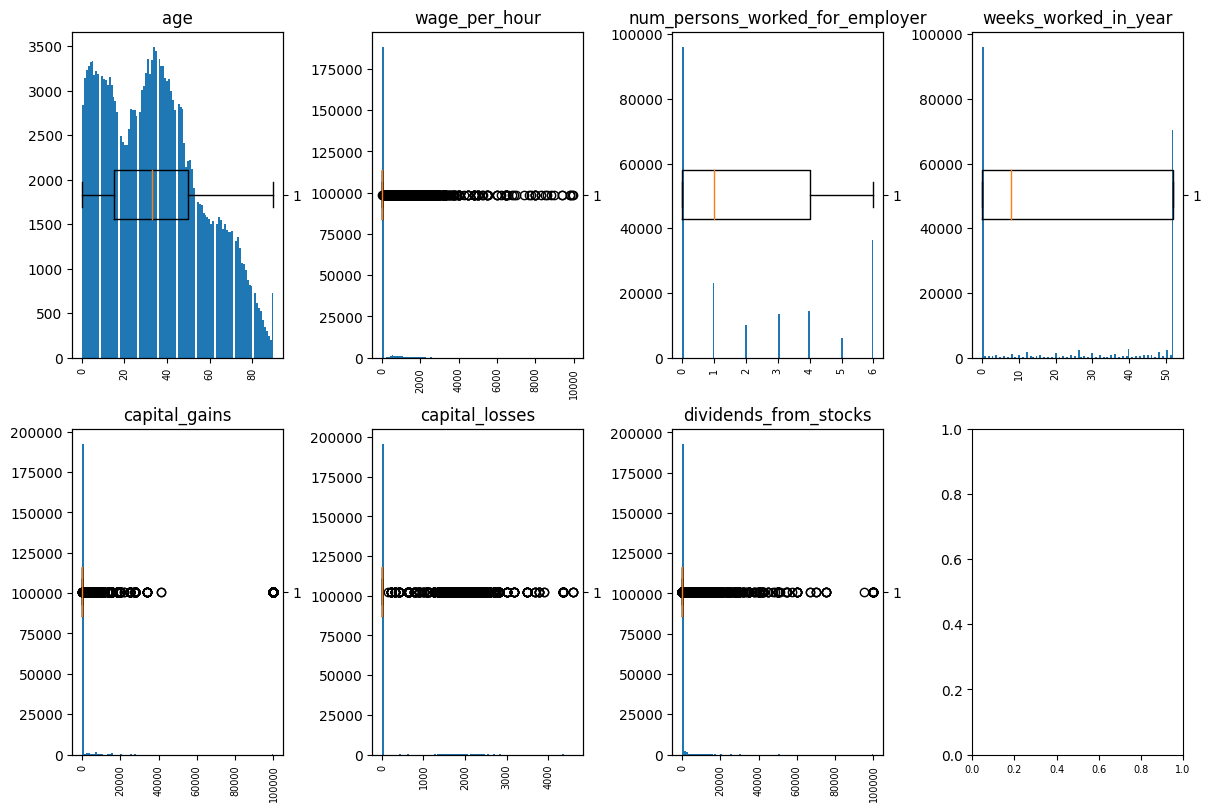

In [6]:
pipe.univariate_reports(dp.df, dp.numcols, 100, 2, 4, (12,8))

<div style='color:#09f'>

- **Numeric features**
  
  - `age`, `wage_per_hour`, `num_persons_worked_for_employer`, `weeks_worked_in_year`, `capital_gains`,	`capital_losses`, `dividends_from_stocks` all do not conform to normal/uniform/power law distributions. Thus all to be quantile binned.

- Also:
  - `wage_per_hour` - proportion of wage=0 is too high vs looking at occupation codes i.e have jobs, many people are not declaring their wage per hour properly. Problematic field, maybe better to drop.

  - `num_persons_worked_for_employer` - also likely problematic, people could fill this wrongly. "If my employer only employs me, is that 0 or 1?" nevertheless, we will keep this for now.

- After quantiling, `wage_per_hour`, `capital_gains`, `capital_losses`, `dividends_from_stocks` appear uninformative. Let's mark these columns for dropping.



,age,wage_per_hour,num_persons_worked_for_employer,weeks_worked_in_year,capital_gains,capital_losses,dividends_from_stocks
count,199463.000,199463.000,199463.000,199463.000,199463.00,199463.0,199463.000
mean,24.166,0.058,1.437,3.423,0.02,0.0,0.298
std,14.498,0.304,1.990,3.739,0.14,0.0,0.998
min,0.000,0.000,0.000,0.000,0.00,0.0,0.000
25%,11.000,0.000,0.000,0.000,0.00,0.0,0.000
50%,24.000,0.000,0.000,0.000,0.00,0.0,0.000
75%,37.000,0.000,3.000,8.000,0.00,0.0,0.000
max,49.000,2.000,5.000,8.000,1.00,0.0,5.000


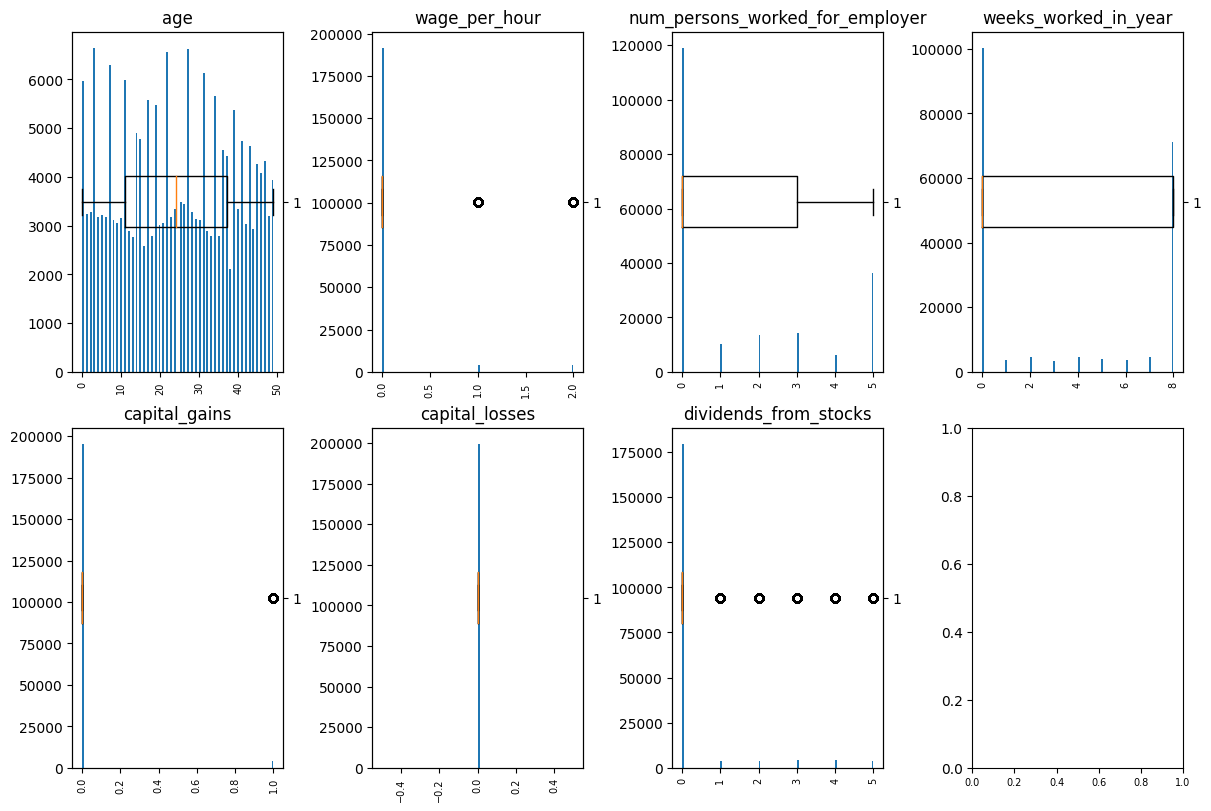

In [7]:
dp.create_quantiles()
pipe.univariate_reports(dp.df, dp.numcols, 100, 2, 4, (12,8))

,education,enroll_in_edu_inst_last_wk,marital_stat,race,sex,country_of_birth_father,country_of_birth_mother,country_of_birth_self
count,199463,199463,199463,199463,199463,199463,199463,199463
unique,17,3,7,5,2,43,43,43
top,High school graduate,Not in universe,Never married,White,Female,United-States,United-States,United-States
freq,48390,186887,86457,167314,103952,159115,160428,176934


High school graduate                      48390
Children                                  47404
Some college but no degree                27816
Bachelors degree(BA AB BS)                19862
7th and 8th grade                          8005
10th grade                                 7555
11th grade                                 6874
Masters degree(MA MS MEng MEd MSW MBA)     6541
9th grade                                  6228
Associates degree-occup /vocational        5354
Associates degree-academic program         4361
5th or 6th grade                           3277
12th grade no diploma                      2125
1st 2nd 3rd or 4th grade                   1799
Prof school degree (MD DDS DVM LLB JD)     1790
Doctorate degree(PhD EdD)                  1263
Less than 1st grade                         819
Name: education, dtype: int64

Not in universe          186887
High school                6889
College or university      5687
Name: enroll_in_edu_inst_last_wk, dtype: int64

Never mar

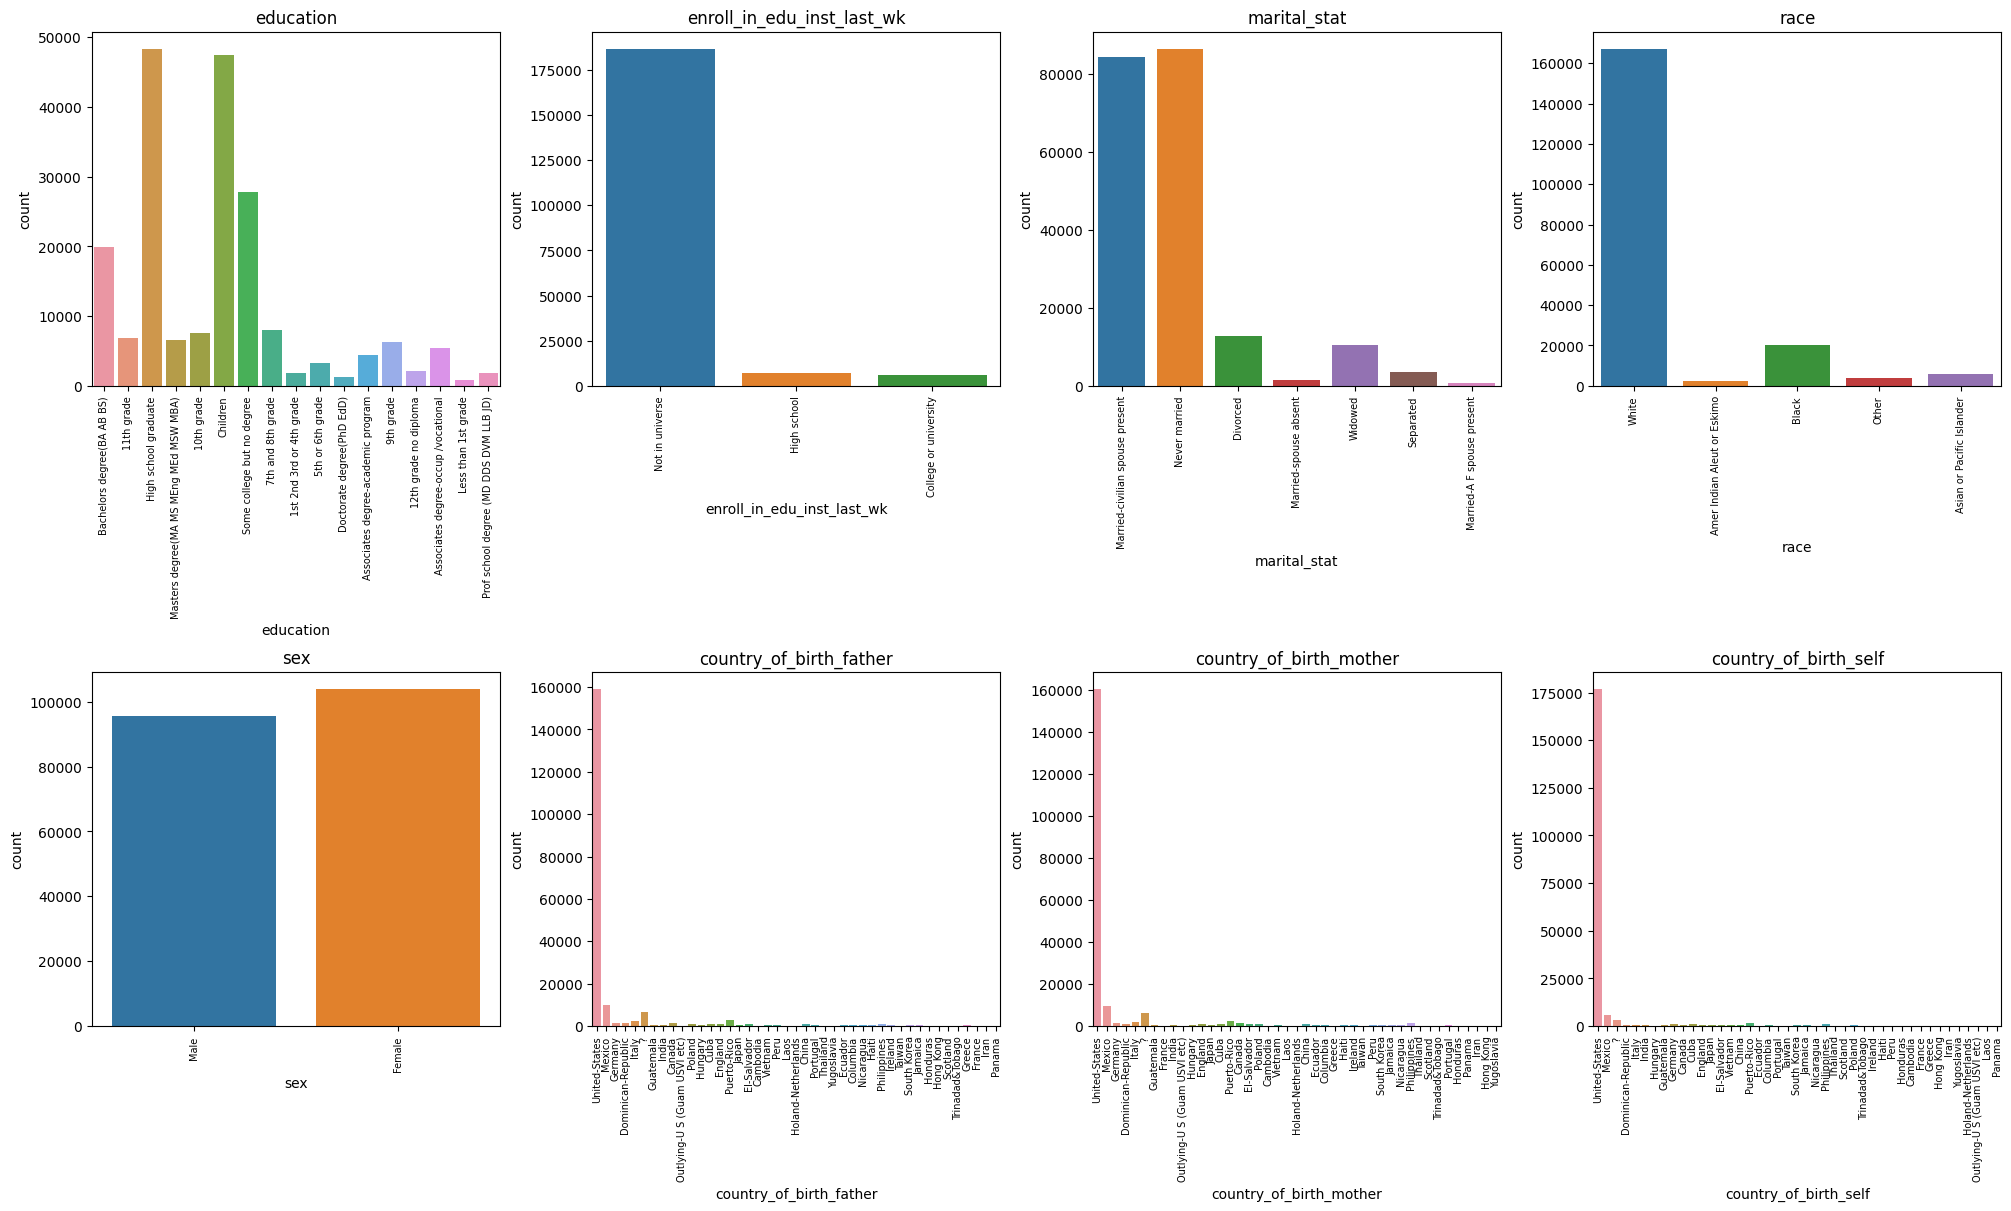

In [8]:
pipe.univariate_reports(dp.df, dp.strcols[:8], 100, 2, 4, (20,12))

,citizenship,class_of_worker,detailed_industry_recode,detailed_occupation_recode,major_industry_code,major_occupation_code,hispanic_origin,member_of_a_labor_union
count,199463,199463,199463.0,199463.0,199463,199463,199463,199463
unique,5,9,52.0,47.0,24,15,10,3
top,Native- Born in the United States,Not in universe,0.0,0.0,Not in universe or children,Not in universe,All other,Not in universe
freq,176937,100220,100659.0,100659.0,100659,100659,171853,180408


Native- Born in the United States              176937
Foreign born- Not a citizen of U S              13399
Foreign born- U S citizen by naturalization      5853
Native- Born abroad of American Parent(s)        1756
Native- Born in Puerto Rico or U S Outlying      1518
Name: citizenship, dtype: int64

Not in universe                   100220
Private                            72004
Self-employed-not incorporated      8438
Local government                    7781
State government                    4226
Self-employed-incorporated          3265
Federal government                  2925
Never worked                         439
Without pay                          165
Name: class_of_worker, dtype: int64

0.0     100659
33.0     17061
43.0      8281
4.0       5982
42.0      4681
45.0      4480
29.0      4208
37.0      4021
41.0      3964
32.0      3594
35.0      3379
39.0      2936
34.0      2765
44.0      2548
2.0       2195
11.0      1763
50.0      1702
40.0      1650
47.0      1644
38.0  

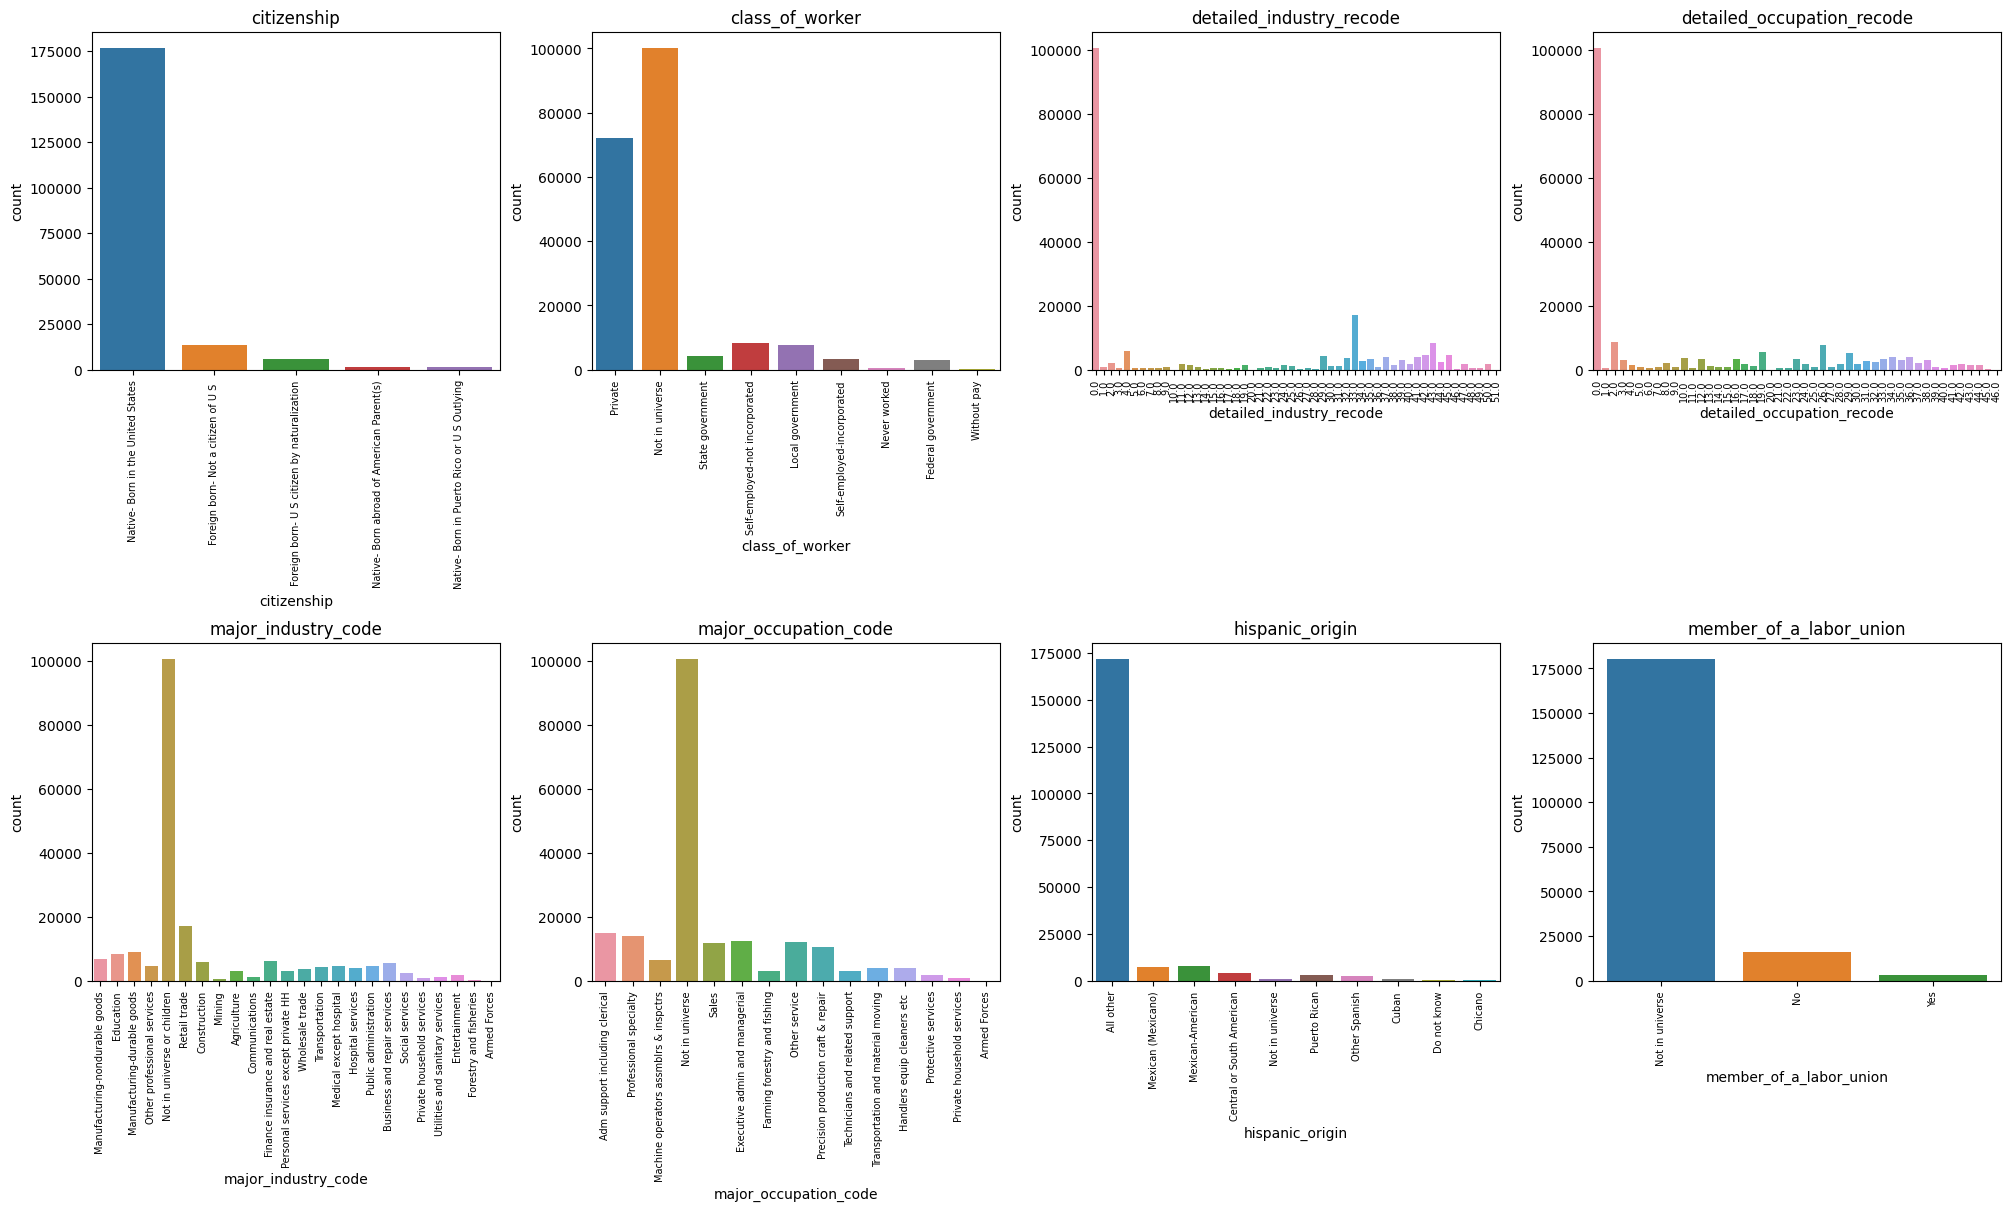

In [9]:
pipe.univariate_reports(dp.df, dp.strcols[8:16], 100, 2, 4, (20,12))

,reason_for_unemployment,full_or_part_time_employment_stat,detailed_household_and_family_stat,detailed_household_summary_in_household,family_members_under_18,own_business_or_self_employed,year,tax_filer_stat
count,199463,199463,199463,199463,199463,199463.0,199463.0,199463
unique,6,8,38,8,5,3.0,2.0,6
top,Not in universe,Children or Armed Forces,Householder,Householder,Not in universe,0.0,94.0,Nonfiler
freq,193393,123731,53231,75454,144193,180621.0,99802.0,75072


Not in universe          193393
Other job loser            2038
Re-entrant                 2019
Job loser - on layoff       976
Job leaver                  598
New entrant                 439
Name: reason_for_unemployment, dtype: int64

Children or Armed Forces              123731
Full-time schedules                    40718
Not in labor force                     26804
PT for non-econ reasons usually FT      3322
Unemployed full-time                    2311
PT for econ reasons usually PT          1209
Unemployed part- time                    843
PT for econ reasons usually FT           525
Name: full_or_part_time_employment_stat, dtype: int64

Householder                                        53231
Child <18 never marr not in subfamily              50307
Spouse of householder                              41683
Nonfamily householder                              22209
Child 18+ never marr Not in a subfamily            12027
Secondary individual                                6121
Other 

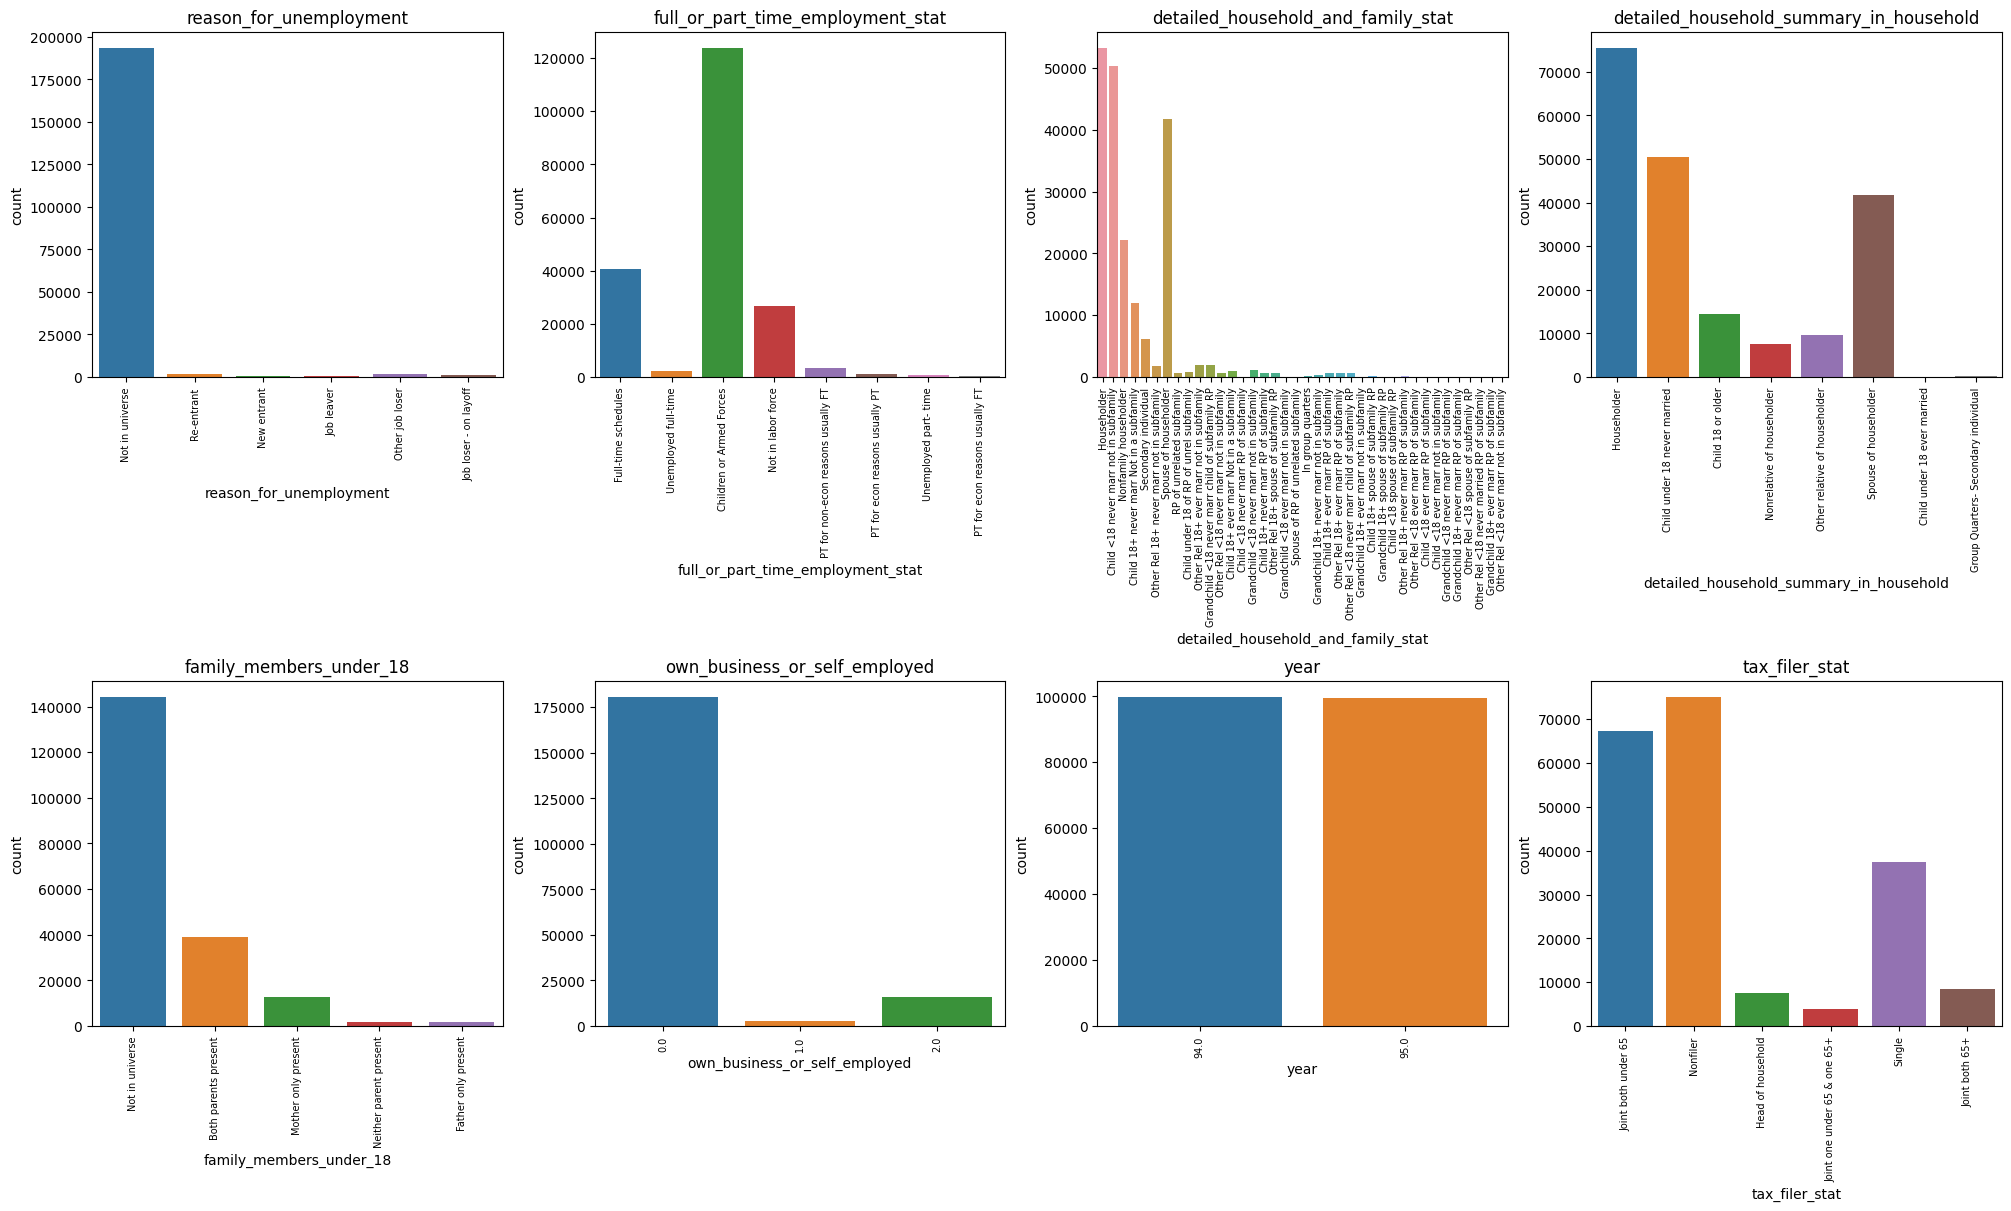

In [10]:
pipe.univariate_reports(dp.df, dp.strcols[16:24], 100, 2, 4, (20,12))

,region_of_previous_residence,state_of_previous_residence,migration_code_change_in_msa,migration_code_change_in_reg,fill_inc_questionnaire_for_veteran_s_admin,veterans_benefits,income_group,migration_code_move_within_reg
count,199463,199463,199463,199463,199463,199463.0,199463,199463
unique,6,51,10,9,3,3.0,2,10
top,Not in universe,Not in universe,?,?,Not in universe,2.0,- 50000.,?
freq,183692,183692,99661,99661,197479,150088.0,187084,99661


Not in universe    183692
South                4889
West                 4073
Midwest              3574
Northeast            2705
Abroad                530
Name: region_of_previous_residence, dtype: int64

Not in universe         183692
California                1714
Utah                      1063
Florida                    849
North Carolina             812
?                          708
Abroad                     670
Oklahoma                   625
Minnesota                  576
Indiana                    533
North Dakota               499
New Mexico                 463
Michigan                   441
Alaska                     290
Kentucky                   244
Arizona                    243
New Hampshire              242
Wyoming                    241
Colorado                   239
Oregon                     236
West Virginia              231
Georgia                    227
Montana                    226
Alabama                    216
Ohio                       211
Texas              

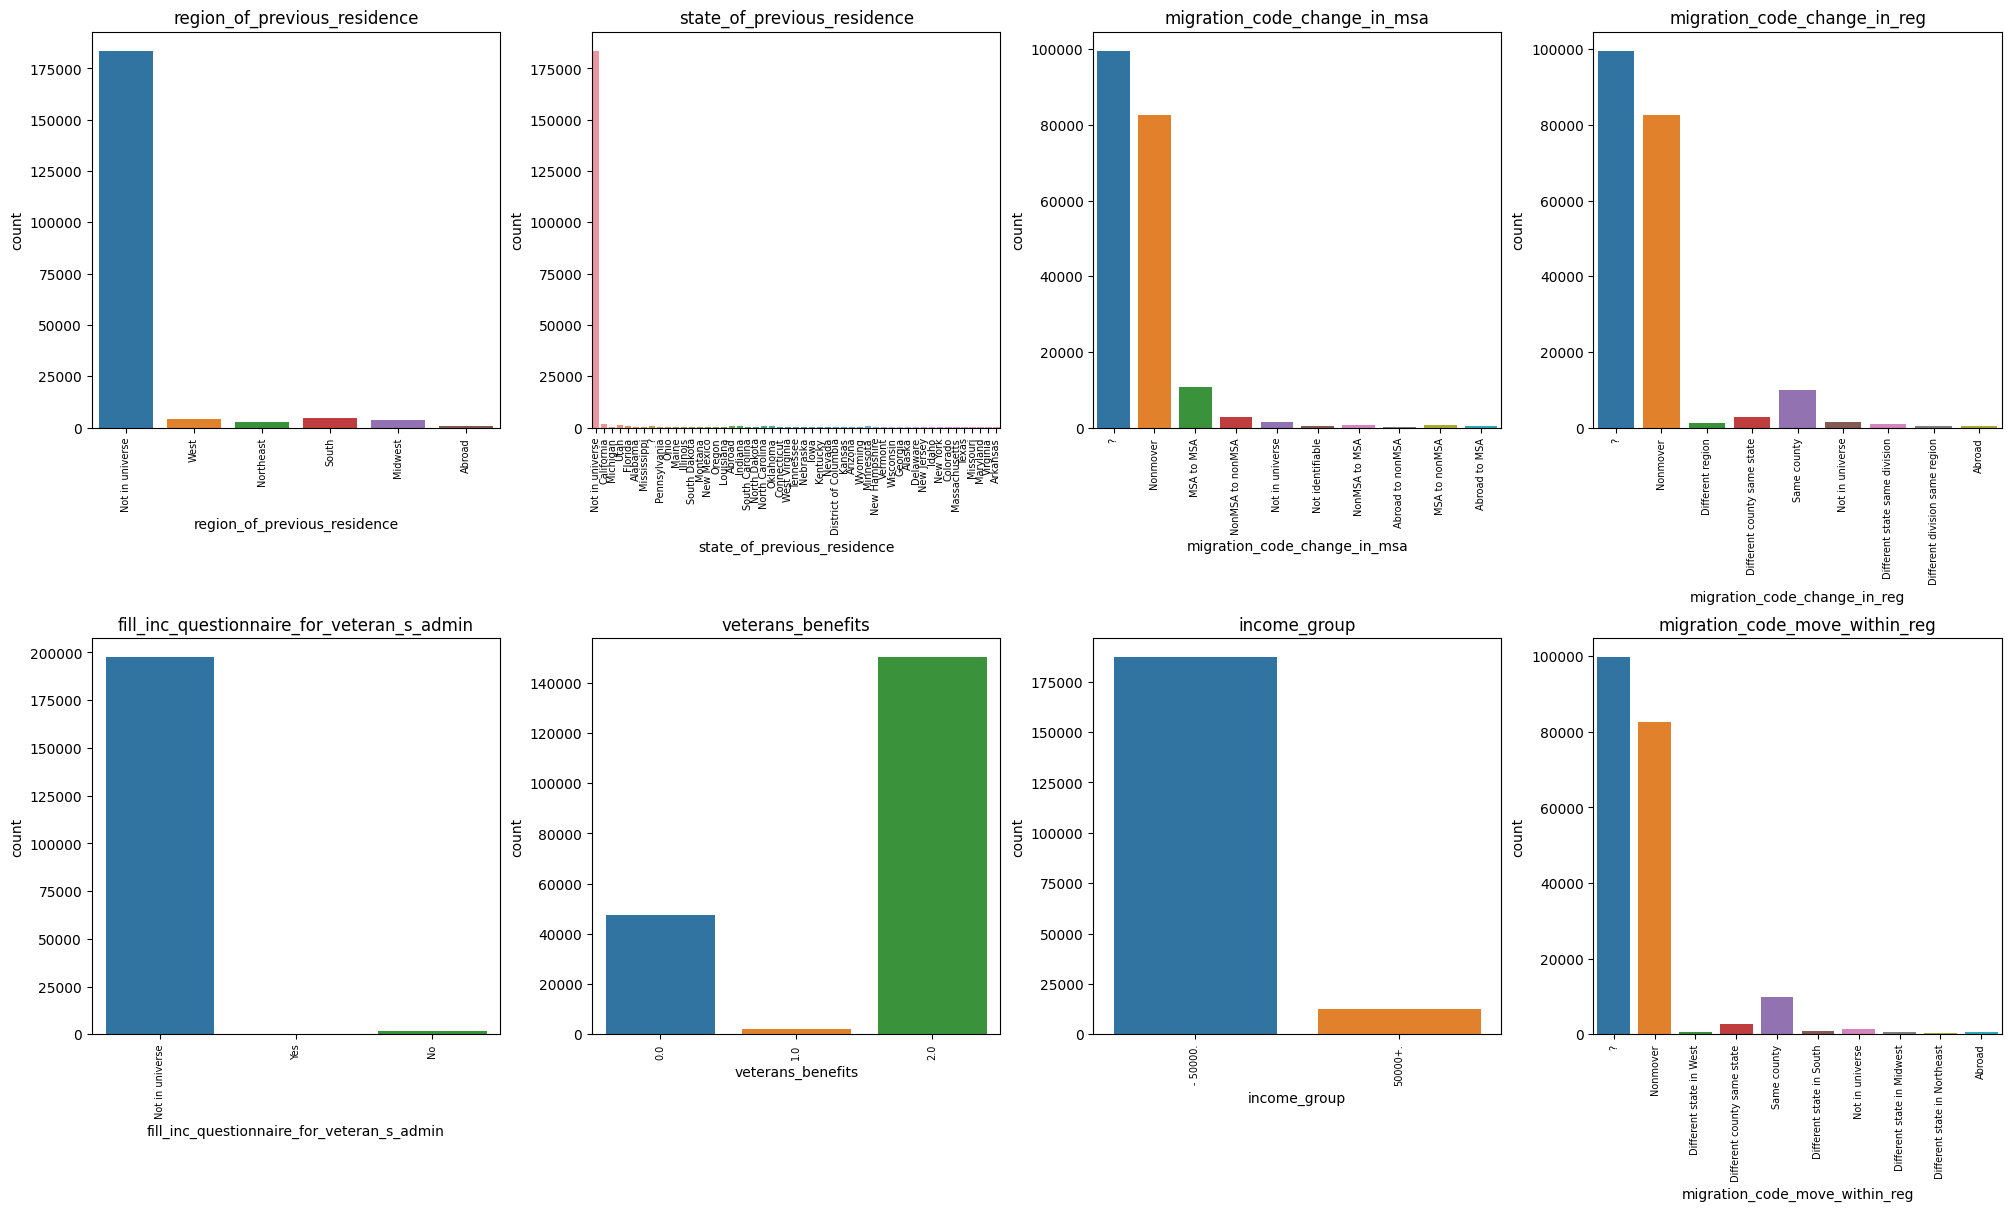

In [11]:
pipe.univariate_reports(dp.df, dp.strcols[24:32], 100, 2, 4, (20,12))

,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt
count,199463,199463
unique,3,4
top,Not in universe under 1 year old,?
freq,101177,99661


Not in universe under 1 year old    101177
Yes                                  82515
No                                   15771
Name: live_in_this_house_1_year_ago, dtype: int64

?                  99661
Not in universe    84031
No                  9985
Yes                 5786
Name: migration_prev_res_in_sunbelt, dtype: int64



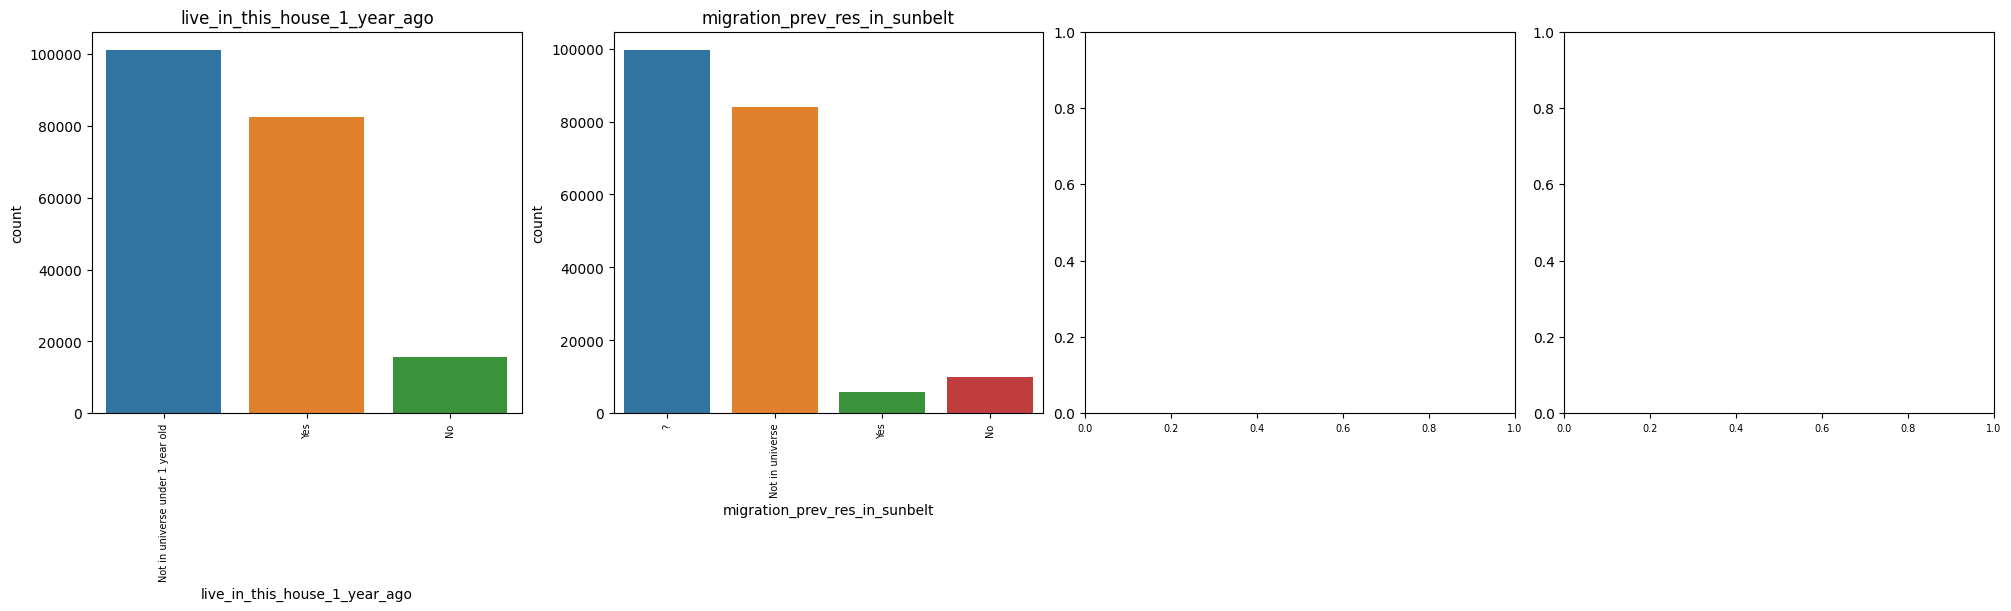

In [12]:
pipe.univariate_reports(dp.df, dp.strcols[32:], 100, 1, 4, (20,6))

<div style='color:#09f'>

- **Categorical features**

  - `education` - feature engineered `eduyear` based on [Census Data Description](https://docs.1010data.com/Tutorials/MachineLearningExamples/CensusIncomeDataSet.html), which specifies the number of years spent in education

  - No other features of note.

- **delete non-essential/uninformative columns**
  - Delete `education`, `year`, `capital_gains`, `capital_losses`, `dividends_from_stocks`, `wages_per_hour`
  - as they are either uninformative or have been engineered elsewhere.
  - `year` is 1994 or 1995, year survey was taken. Since surveys are only 1 year apart, not much meaningful difference.





In [ ]:
dp.create_eduyear()
dp.delete_unused_features()

<div style='color:#09f'>

- **preprocessing pipeline**
  
  - apply `RobustScaler` on numerics - distributions are still skewed for some, so lets center on median rather than mean.
  
  - apply `OneHotEncoder` on nominal - so we can calculate Pearson correlations

- **generate Pearson correlation coefficients**
  
  - export to CSV for easier review in Excel with conditional formatting, see if there are interesting relationships to note.

  - regression analysis/hypothesis testing etc can be done after this step if necessary.

In [26]:
dp.fit_transform()
corr = dp.dfohe.corr()
corr.to_csv('corr.csv')

# 5. Feature Engineering

Feature engineering is the process of transforming variables so that they are potentially more useful for the task at hand. Domain expertise is extremely useful for feature engineering. Hence, it is always important to try and understand as much as you can about the problem's domain.

Apart from using domain knowledge, we can also perform some simple feature engineering by aggregating different categories within a variable.

When conducting feature engineering, it is important to keep in mind the task at hand and take reference from the insights that were derived from the EDA. This will ensure that the features that were created will be useful for the task at hand. The main task that you are feature engineering for is unsupervised learning (clustering).

#### 5.1. Engineer 3 new features for this dataset. Briefly explain why you chose these features and how you think they could be useful for clustering.

# 6. Reproducible Data Pipeline


```

#### 6.1. Finally, take all the code you've written and create a Python module named `datapipeline.py` in the [src folder](./src). The module should at least contain the following function. The transform function should take in the absolute path to the data file as a parameter and return a pandas dataframe.

```python
def transform(data_path):
  """
  :param data_path: ......
  :return: ......
  """
  return feature_engineered_dataframe

In [ ]:
df_encoded = pipe.transform(data_path)

# 7. Submission




#### 7.1. Create a `conda.yml` file at the base of the assignment folder. Add (manually) your required dependencies to the file named `conda.yml` .

In [9]:
!conda env export -p /Users/han/opt/anaconda3/envs/py310 --from-history>crossplatformcompat.yml
!conda env export -p /Users/han/opt/anaconda3/envs/py310>packagespecific.yml

In [ ]:
%%writefile conda.yml
name: py310
channels:
  - defaults
dependencies:
  - python=3.10
  - decorator
  - executing
  - xz
  - openssl
  - wcwidth
  - pexpect
  - prompt-toolkit
  - entrypoints
  - pickleshare
  - ca-certificates
  - zlib
  - pyzmq
  - traitlets
  - stack_data
  - python-dateutil
  - asttokens
  - libcxx
  - readline
  - tk
  - setuptools
  - libsodium
  - backcall
  - debugpy
  - jedi
  - libffi
  - ncurses
  - parso
  - pure_eval
  - pip
  - psutil
  - tzdata
  - jupyter_client
  - certifi
  - wheel
  - ipython
  - zeromq
  - packaging
  - jupyter_core
  - matplotlib-inline
  - six
  - nest-asyncio
  - ptyprocess
  - bzip2
  - sqlite
  - tornado
  - appnope
  - pygments
  - ipykernel
  - pip:
      - matplotlib==3.6.2
      - numpy==1.24.0
      - pandas==1.5.2
      - pyodbc==4.0.35
      - requests==2.28.1
      - requests-oauthlib==1.3.1
      - scikit-learn==1.2.0
      - scipy==1.9.3
      - seaborn==0.12.1
      - termcolor==2.1.1
      - tqdm==4.64.1
prefix: /Users/han/opt/anaconda3/envs/py310


# Explore Clustering Algorithms

Load the '[`A1P2_clustering.ipynb`](A1P2_clustering.ipynb)' notebook and start working from there.

<h1><center>End of Assignment 1 - Part 1: Data Cleaning & Feature Engineering</center></h1>